# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je do 18. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 24. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [73]:
import pandas as pd
import ipyplot
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler

SEED = 333
TEST_SIZE = 1/5
VAL_SIZE = 1/4
PIXELS = 32


tf.random.set_seed(SEED)

In [7]:
### odtud už je to Vaše
df = pd.read_csv("train.csv")
display(df.head(10))
display(df.dtypes)
display(df["label"].value_counts())


,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
1,4,4,4,4,4,4,5,5,5,6,...,4,4,4,4,4,4,4,4,4,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
6,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
8,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


pix1       int64
pix2       int64
pix3       int64
pix4       int64
pix5       int64
           ...  
pix1021    int64
pix1022    int64
pix1023    int64
pix1024    int64
label      int64
Length: 1025, dtype: object

label
2    5645
3    5628
0    5627
5    5618
9    5617
4    5605
8    5571
6    5570
1    5562
7    5557
Name: count, dtype: int64

***Fashion mnist dataset*** obsahuje 10 různých druhů oblečení. Vidíme, že jednotlivé kategorie jsou poměrně vyvážené. ***Label*** si převedu na kategorickou reprezentaci a na jednotlivé ***pixely*** mi bude stačit uint8.

In [8]:
df["label"] = df["label"].astype("category")
cols = df.columns[df.dtypes.eq('int64')]
df[cols] = df[cols].astype("uint8")

Pár obrázků si zobrazím ve zvětšené podobě.

/home/daniel/School/ML2/BI-ML2-2023-rileydan/ml2/lib/python3.8/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



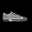
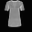
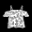
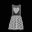
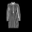
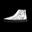
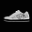
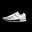
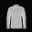
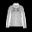
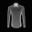
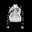
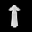
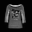
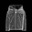
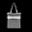
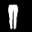
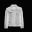
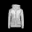
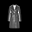
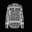
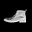
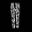
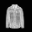
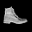
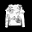
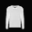
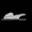
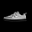
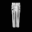
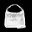
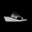
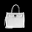
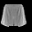
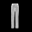
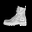
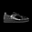
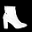
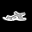
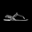
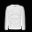
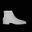
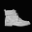
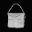
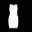
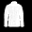
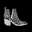
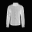
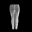
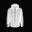
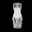
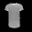
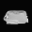
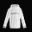
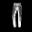
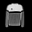
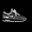
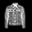
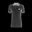
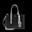


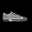
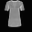
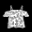
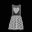
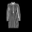
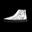
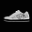
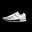
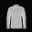
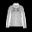
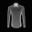
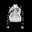
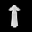
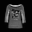
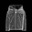
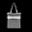
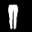
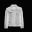
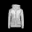
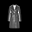
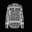
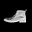
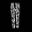
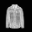
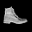
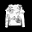
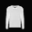
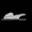
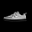
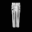
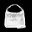
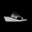
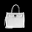
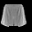
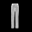
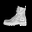
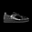
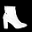
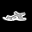
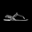
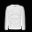
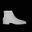
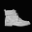
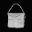
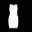
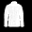
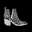
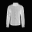
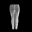
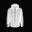
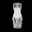
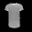
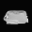
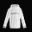
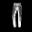
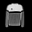
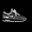
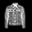
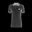
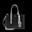

In [9]:
def to_image(arr: pd.Series):
    return Image.fromarray(arr.to_numpy(dtype=np.uint8).reshape(PIXELS, PIXELS), mode="L")
def to_image_df(arr: pd.Series):
    return Image.fromarray(arr[1:].to_numpy(dtype=np.uint8).reshape(PIXELS, PIXELS), mode="L")

images = []
image_cnt = 60
for i in range(image_cnt):
    images.append(to_image_df(df.iloc[i]))

ipyplot.plot_images(images, max_images=image_cnt, img_width=75)

Dataset si rozdělím na validační, testovací a trénovací množiny.

In [86]:
train_data, test_data, train_target, test_target = train_test_split(
    df.drop(columns=["label"]),
    df["label"],
    test_size=TEST_SIZE,
    random_state=SEED
)

train_data, val_data, train_target, val_target = train_test_split(
    df.drop(columns=["label"]),
    df["label"],
    test_size=VAL_SIZE,
    random_state=SEED
)


V tomto úkolu porovnám schopnosti dopředné(FNN) a konvoluční(CNN) neuronové sítě si poradit s kategorizací oblečení. Využiji knihovny tensorflow.

# FNN - feedforward neural network

Co se týče vhodnosti modelu, řekl bych, že je dopředná neuronová síť použitelná, ale existují lepší řešení jako právě konvoluční neuronová síť, která je schopná si dobře vytvářet příznaky, v mělčích vrstvách různé čáry atd. a v hlubších vrstvách z nich rozeznávat složitější tvary.

In [198]:
def make_model_fnn(n_layers, layer_size, regularizer=None, regularization_layer=None):
    model = tf.keras.models.Sequential(name="fnn")
    model.add(tf.keras.Input(shape=(PIXELS*PIXELS,)))
    for i in range(n_layers):
        model.add(tf.keras.layers.Dense(layer_size, activation='relu', kernel_regularizer=regularizer))
        if regularization_layer and "batch" in regularization_layer:
            model.add(tf.keras.layers.BatchNormalization())
        if regularization_layer and"dropout" in regularization_layer:
            model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    return model

def train_model(model, train_data, train_target, val_data, val_target, optimizer=None, preprocessing="", epochs=10):
    train_data = train_data.to_numpy(dtype=np.uint8)
    val_data = val_data.to_numpy(dtype=np.uint8)
    if preprocessing == "n_l":
        normalizer = Normalizer()
        train_data = normalizer.fit_transform(train_data)
        val_data = normalizer.fit_transform(val_data)
    elif preprocessing == "s":
        standardizer = StandardScaler()
        standardizer.fit(train_data)
        standardizer.transform(train_data)
        standardizer.transform(val_data)
    elif preprocessing == "n_g":
        train_data = train_data / 255.0
        val_data = val_data / 255.0
        
    if model.name == "cnn":
        train_data = train_data.reshape(train_data.shape[0], PIXELS, PIXELS)
        val_data = val_data.reshape(val_data.shape[0], PIXELS, PIXELS)

    if optimizer is None:
        optimizer = tf.keras.optimizers.Adam()

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
    )

    results = model.fit(
        train_data,
        train_target,
        epochs=epochs,
        validation_data=[val_data, val_target],
        batch_size=128
    )
    return results, model


#### Hloubky a velikosti vrstev

Při volbě velikostí vrstev a hloubky sítě jsem nevybíral příliš vysoká čísla, abych zbytečně nevytvářel přeučené modely. Tato úloha není extrémně komplexní a měla by stačit jednodušší síť.

In [ ]:
depths = np.array(range(1,11))
widths = np.array([5, 10, 20, 50, 100, 200])

params = np.transpose([np.tile(depths, widths.size), np.repeat(widths, depths.size)])

results_wd = []
results_wd_complete = []
for depth, width in params:
    model = make_model_fnn(depth, width)
    result, _ = train_model(model, train_data, train_target, val_data, val_target)
    results_wd.append(np.max(result.history["val_accuracy"]))
    results_wd_complete.append(result)


Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 2.3667 - accuracy: 0.0985 - val_loss: 2.3023 - val_accuracy: 0.0980
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 2.3030 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1023 - val_loss: 2.3027 - val_accuracy: 0.0982
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1031
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0959 - val_loss: 2.3028 - val_accuracy: 0.0979
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy:

Text(0.5, 0, 'Validation accuracy')

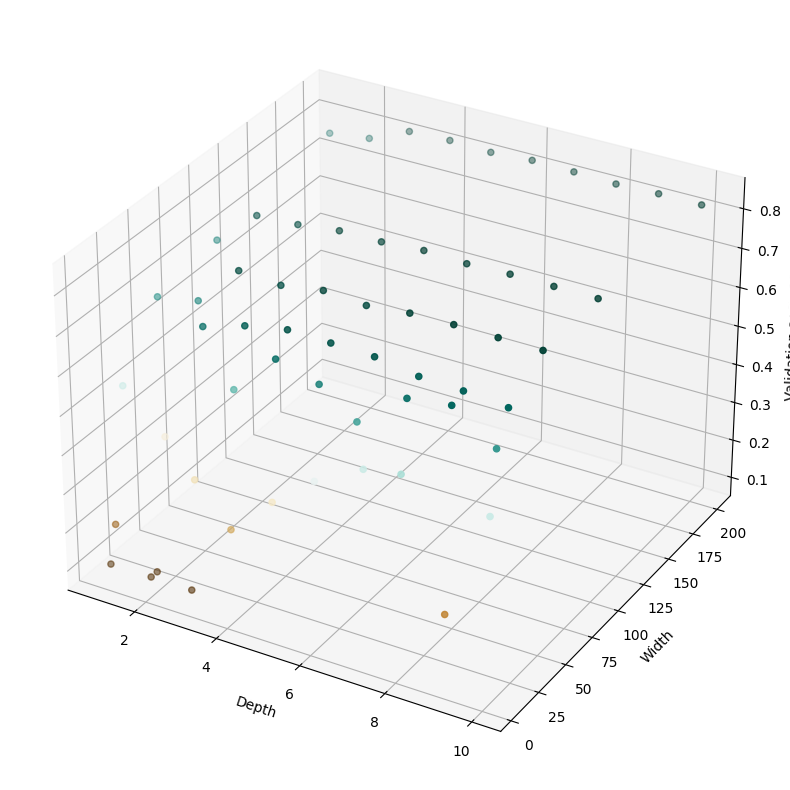

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(params[:,0], params[:,1], results_wd, c=results_wd, cmap='BrBG')
ax.set_xlabel('Depth')
ax.set_ylabel('Width')
ax.set_zlabel('Validation accuracy')

Je vidět, že hloubka výsledky tohoto modelu tolik nezlepšuje a naopak je lepší mít širší vrstvy. Dále tedy budu pracovat s modelem s 5 vrstvami o 200 neuronech.

#### Preprocessing

Chtěl bych vyzkoušet standardizaci, normalizaci jednolivých obrázků a normalizaci celého datasetu. Myslím si, že nejlepší by měl být jeden ze způsobů normalizace.

In [151]:
results_none, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target)
results_std, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, preprocessing="s")
results_norm_l, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, preprocessing="n_l")
results_norm_g, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, preprocessing="n_g")


Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 1.1163 - accuracy: 0.6887 - val_loss: 0.7077 - val_accuracy: 0.7448
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6448 - accuracy: 0.7634 - val_loss: 0.6642 - val_accuracy: 0.7676
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5853 - accuracy: 0.7855 - val_loss: 0.5505 - val_accuracy: 0.7999
Epoch 4/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.5557 - accuracy: 0.7989 - val_loss: 0.5760 - val_accuracy: 0.7975
Epoch 5/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.5311 - accuracy: 0.8056 - val_loss: 0.5799 - val_accuracy: 0.7918
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5071 - accuracy: 0.8141 - val_loss: 0.5177 - val_accuracy: 0.8136
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4943 - accuracy: 0.8199 - val_loss: 0.5265 - val_accuracy:

<Axes: >

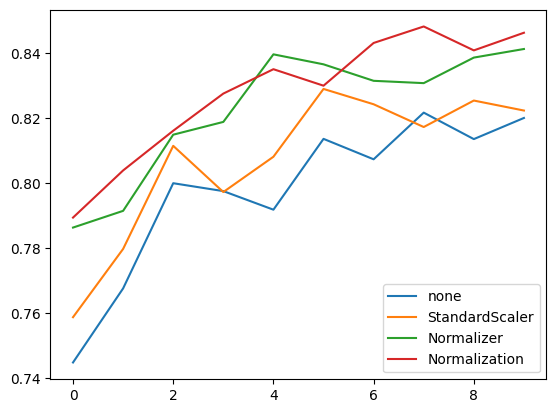

In [152]:
results_preprocessing_df = pd.DataFrame({"none": results_none.history["val_accuracy"], "StandardScaler": results_std.history["val_accuracy"], 
                                         "Normalizer": results_norm_l.history["val_accuracy"], "Normalization": results_norm_g.history["val_accuracy"]})
results_preprocessing_df[["none", "StandardScaler", "Normalizer", "Normalization"]].plot()

A opravdu mají nejlepší validační přesnost obě normalizace, mohlo by to být tím, že se obrázky vhodně naškálují a zároveň se zachovají rysy obrázků oproti standardizaci, která data standardizuje po příznacích.

#### Optimalizační metody

Dále vyzkouším známé optimalizační metody a porovnám jejich přesnosti na validační množině.

In [ ]:
results_opt_adam, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_opt_adg, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adagrad(), preprocessing="n_g")
results_opt_RMS, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.RMSprop(), preprocessing="n_g")
results_opt_SGD, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.SGD(), preprocessing="n_g")

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7864 - accuracy: 0.6900 - val_loss: 0.6056 - val_accuracy: 0.7669
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5499 - accuracy: 0.7932 - val_loss: 0.5412 - val_accuracy: 0.8004
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4911 - accuracy: 0.8160 - val_loss: 0.5078 - val_accuracy: 0.8111
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4523 - accuracy: 0.8305 - val_loss: 0.4920 - val_accuracy: 0.8173
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4234 - accuracy: 0.8414 - val_loss: 0.4793 - val_accuracy: 0.8199
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4007 - accuracy: 0.8485 - val_loss: 0.4711 - val_accuracy: 0.8311
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3846 - accuracy: 0.8544 - val_loss: 0.4550 - val_accuracy:

<Axes: >

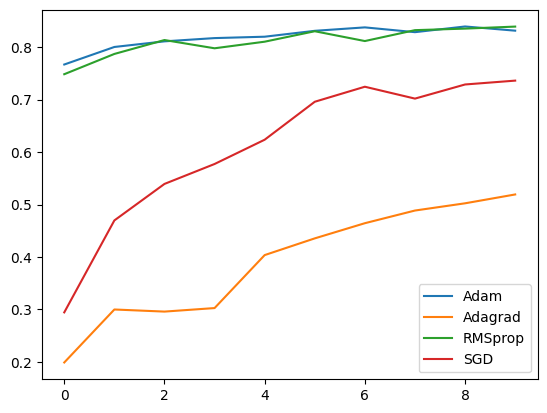

In [ ]:
results_opt_df = pd.DataFrame({"Adam": results_opt_adam.history["val_accuracy"], "Adagrad": results_opt_adg.history["val_accuracy"],
                                "RMSprop": results_opt_RMS.history["val_accuracy"], "SGD": results_opt_SGD.history["val_accuracy"]})
results_opt_df[["Adam", "Adagrad", "RMSprop", "SGD"]].plot()

Nejlépe vyšel optimalizační algoritmus Adam, který je vylepšením RMSprop, který je rozšířením Adagrad.

#### Regularizace

Nakonec ozkouším různé regularizační metody a porovnám jejich přesnosti na validační množině.

In [160]:
results_reg_none, _ = train_model(make_model_fnn(5, 200), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_l1, _ = train_model(make_model_fnn(5, 200, regularizer=tf.keras.regularizers.L1(0.0001)), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_l2, _ = train_model(make_model_fnn(5, 200, regularizer=tf.keras.regularizers.L2(0.0001)), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_batch, _ = train_model(make_model_fnn(5, 200, regularization_layer="batch"), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_drop, _ = train_model(make_model_fnn(5, 200, regularization_layer="dropout"), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_bd, _ = train_model(make_model_fnn(5, 200, regularization_layer=["batch", "dropout"]), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7046 - accuracy: 0.7352 - val_loss: 0.5496 - val_accuracy: 0.7957
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5373 - accuracy: 0.7993 - val_loss: 0.5326 - val_accuracy: 0.7977
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4870 - accuracy: 0.8180 - val_loss: 0.4717 - val_accuracy: 0.8210
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4514 - accuracy: 0.8306 - val_loss: 0.4792 - val_accuracy: 0.8272
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4229 - accuracy: 0.8415 - val_loss: 0.4492 - val_accuracy: 0.8391
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4060 - accuracy: 0.8465 - val_loss: 0.4446 - val_accuracy: 0.8379
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3863 - accuracy: 0.8530 - val_loss: 0.4565 - val_accuracy:

<Axes: >

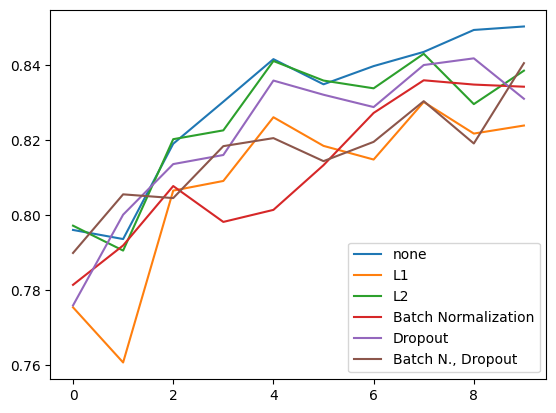

In [159]:
results_reg_df = pd.DataFrame({"none": results_reg_none.history["val_accuracy"], "L1": results_reg_l1.history["val_accuracy"],
                                "L2": results_reg_l2.history["val_accuracy"], "Batch Normalization": results_reg_batch.history["val_accuracy"],
                                "Dropout": results_reg_drop.history["val_accuracy"], "Batch N., Dropout": results_reg_bd.history["val_accuracy"]})
results_reg_df[["none", "L1", "L2", "Batch Normalization", "Dropout", "Batch N., Dropout"]].plot()

Překvapivě nejlépe vyšlo nepoužívat žádnou regularizaci. Nevím, čím by to mohlo být, možná regularizace vyžaduje delší trénování (více epoch)?

# CNN

Nyní přejdu ke konvolučním sítím. Jak jsem již psal výše, myslím si, že by mohla dosáhnout lepších výsledků oproti dopředným sítím.
Model sestavím z konvolučních vrstev následovanými maxPoolingem a na závěr přidám dvě FCO vrstvy. Konvolučním vrstvám se bude postupně zvětšovat velikost výstupů.

In [176]:
def make_model_cnn(n_layers, start_filters, regularizer=None, regularization_layer=None):
    model = tf.keras.models.Sequential(name="cnn")
    model.add(tf.keras.Input(shape=(PIXELS, PIXELS, 1)))

    for i in range(n_layers):
        model.add(tf.keras.layers.Conv2D(filters=(i+1*start_filters), kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizer))
        if regularization_layer and "batch" in regularization_layer:
            model.add(tf.keras.layers.BatchNormalization())
        if regularization_layer and "dropout" in regularization_layer:
            model.add(tf.keras.layers.Dropout(.1))

        model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=regularizer if regularizer!="batch" else None))
    if regularization_layer and "batch" in regularization_layer:
            model.add(tf.keras.layers.BatchNormalization())
    if regularization_layer and "dropout" in regularization_layer:
            model.add(tf.keras.layers.Dropout(.1))
            
    model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizer if regularizer!="batch" else None))
    if regularization_layer and "batch" in regularization_layer:
            model.add(tf.keras.layers.BatchNormalization())
    if regularization_layer and "dropout" in regularization_layer:
            model.add(tf.keras.layers.Dropout(.1))
    
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    return model

#### Hloubka a velikosti vrstev

Jelikož můj počítač nedisponuje NVIDIA GPU, tak mám poměrně omezený výpočetní výkon a budu muset zkoušet omezené množství kombinací hyperparametrů a nebudu moci zkoušet příliš velké sítě. Nejdříve se pokusím vybrat správný počet konvolučních vrstev a velikosti výstupů konvolučních vrstev.

In [170]:
layers = np.array(range(1,4))
filters = np.array([8, 12, 24, 32])

params_cf = np.transpose([np.tile(layers, filters.size), np.repeat(filters, layers.size)])

results_cf = []
results_cf_complete = []
for layer, _filter in params_cf:
    model = make_model_cnn(layer, _filter)
    result, _ = train_model(model, train_data, train_target, val_data, val_target)
    results_cf.append(np.max(result.history["val_accuracy"]))
    results_cf_complete.append(result)

Epoch 1/10
1313/1313 [==============================] - 11s 8ms/step - loss: 1.0800 - accuracy: 0.7714 - val_loss: 0.4767 - val_accuracy: 0.8311
Epoch 2/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.4250 - accuracy: 0.8440 - val_loss: 0.4501 - val_accuracy: 0.8443
Epoch 3/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3605 - accuracy: 0.8666 - val_loss: 0.4642 - val_accuracy: 0.8383
Epoch 4/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.3220 - accuracy: 0.8804 - val_loss: 0.4397 - val_accuracy: 0.8491
Epoch 5/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.2901 - accuracy: 0.8914 - val_loss: 0.4323 - val_accuracy: 0.8559
Epoch 6/10
1313/1313 [==============================] - 12s 10ms/step - loss: 0.2626 - accuracy: 0.9012 - val_loss: 0.4576 - val_accuracy: 0.8616
Epoch 7/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.2384 - accuracy: 0.9102 - val_loss: 0.4828 - val

Text(0.5, 0, 'Validation accuracy')

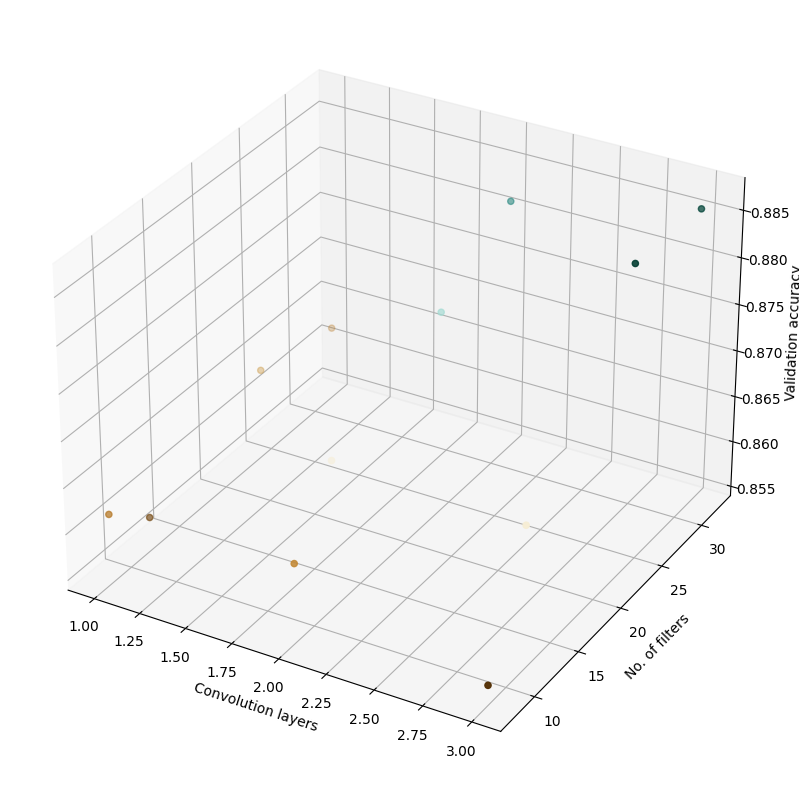

In [171]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(params_cf[:,0], params_cf[:,1], results_cf, c=results_cf, cmap='BrBG')
ax.set_xlabel('Convolution layers')
ax.set_ylabel('No. of filters')
ax.set_zlabel('Validation accuracy')

Podle výsledků budu dále pracovat se sítí se třemi konvolučními vrstvami (Conv2d + MaxPooling) a počáteční velikostí výstupu konvoluční vrstvy 32.

#### Standardizace, normalizace dat

In [178]:
results_none_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target)
results_std_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target, preprocessing="s")
results_norm_l_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target, preprocessing="n_l")
results_norm_g_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target, preprocessing="n_g")

Epoch 1/10
1313/1313 [==============================] - 29s 21ms/step - loss: 0.6279 - accuracy: 0.7789 - val_loss: 0.4641 - val_accuracy: 0.8299
Epoch 2/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.4149 - accuracy: 0.8476 - val_loss: 0.4082 - val_accuracy: 0.8507
Epoch 3/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.3619 - accuracy: 0.8664 - val_loss: 0.4084 - val_accuracy: 0.8543
Epoch 4/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.3288 - accuracy: 0.8784 - val_loss: 0.3635 - val_accuracy: 0.8636
Epoch 5/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.3038 - accuracy: 0.8865 - val_loss: 0.3347 - val_accuracy: 0.8799
Epoch 6/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.2854 - accuracy: 0.8936 - val_loss: 0.3427 - val_accuracy: 0.8748
Epoch 7/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.2648 - accuracy: 0.8996 - val_loss: 0.3315 -

<Axes: >

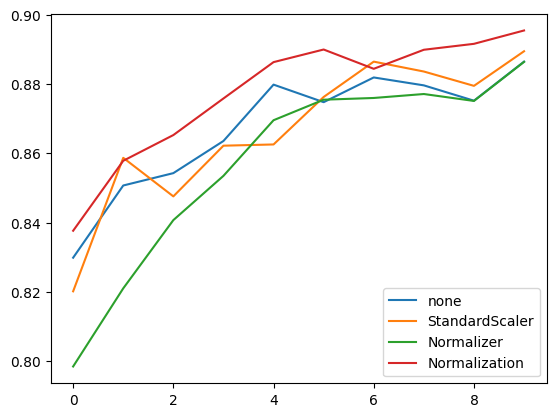

In [179]:
results_preprocessing_df = pd.DataFrame({"none": results_none_cf.history["val_accuracy"], "StandardScaler": results_std_cf.history["val_accuracy"], 
                                         "Normalizer": results_norm_l_cf.history["val_accuracy"], "Normalization": results_norm_g_cf.history["val_accuracy"]})
results_preprocessing_df[["none", "StandardScaler", "Normalizer", "Normalization"]].plot()

Opět má nejlepší výsledky normalizace celého datasetu.

#### Optimalizační metody

In [180]:
results_opt_adam_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_opt_adg_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adagrad(), preprocessing="n_g")
results_opt_RMS_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.RMSprop(), preprocessing="n_g")
results_opt_SGD_cf, _ = train_model(make_model_cnn(3, 32), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.SGD(), preprocessing="n_g")

Epoch 1/10
1313/1313 [==============================] - 29s 21ms/step - loss: 0.6343 - accuracy: 0.7648 - val_loss: 0.4440 - val_accuracy: 0.8335
Epoch 2/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.4115 - accuracy: 0.8482 - val_loss: 0.3945 - val_accuracy: 0.8527
Epoch 3/10
1313/1313 [==============================] - 32s 25ms/step - loss: 0.3483 - accuracy: 0.8695 - val_loss: 0.3694 - val_accuracy: 0.8581
Epoch 4/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.3090 - accuracy: 0.8839 - val_loss: 0.3353 - val_accuracy: 0.8730
Epoch 5/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.2828 - accuracy: 0.8937 - val_loss: 0.3067 - val_accuracy: 0.8863
Epoch 6/10
1313/1313 [==============================] - 33s 25ms/step - loss: 0.2605 - accuracy: 0.9009 - val_loss: 0.3047 - val_accuracy: 0.8871
Epoch 7/10
1313/1313 [==============================] - 33s 25ms/step - loss: 0.2386 - accuracy: 0.9083 - val_loss: 0.3053 -

<Axes: >

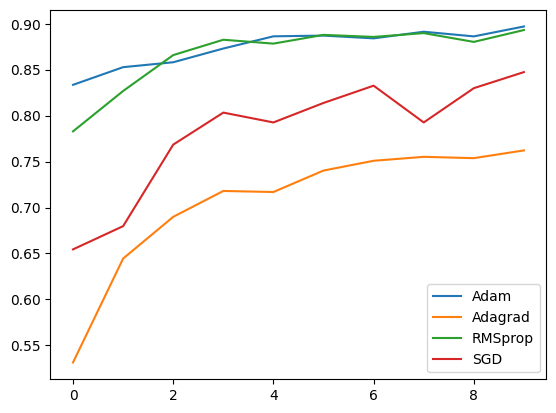

In [182]:
results_opt_df = pd.DataFrame({"Adam": results_opt_adam_cf.history["val_accuracy"], "Adagrad": results_opt_adg_cf.history["val_accuracy"],
                                "RMSprop": results_opt_RMS_cf.history["val_accuracy"], "SGD": results_opt_SGD_cf.history["val_accuracy"]})
results_opt_df[["Adam", "Adagrad", "RMSprop", "SGD"]].plot()

Opět nejlépe vycházejí pokročilejší algoritmy Adam a RMSprop.

#### Regularizace

In [183]:
results_reg_l1_cf, _ = train_model(make_model_cnn(3, 32, regularizer=tf.keras.regularizers.L1(0.0001)), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_l2_cf, _ = train_model(make_model_cnn(3, 32, regularizer=tf.keras.regularizers.L2(0.0001)), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_batch_cf, _ = train_model(make_model_cnn(3, 32, regularization_layer="batch"), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_drop_cf, _ = train_model(make_model_cnn(3, 32, regularization_layer="dropout"), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")
results_reg_bd_cf, _ = train_model(make_model_cnn(3, 32, regularization_layer=["batch", "dropout"]), train_data, train_target, val_data, val_target, optimizer=tf.keras.optimizers.Adam(), preprocessing="n_g")

Epoch 1/10
1313/1313 [==============================] - 31s 23ms/step - loss: 1.0126 - accuracy: 0.7475 - val_loss: 0.7700 - val_accuracy: 0.8194
Epoch 2/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.7142 - accuracy: 0.8271 - val_loss: 0.7084 - val_accuracy: 0.8240
Epoch 3/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.6218 - accuracy: 0.8450 - val_loss: 0.5987 - val_accuracy: 0.8485
Epoch 4/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.5630 - accuracy: 0.8583 - val_loss: 0.5950 - val_accuracy: 0.8401
Epoch 5/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.5287 - accuracy: 0.8654 - val_loss: 0.5258 - val_accuracy: 0.8662
Epoch 6/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.5015 - accuracy: 0.8708 - val_loss: 0.5058 - val_accuracy: 0.8672
Epoch 7/10
1313/1313 [==============================] - 33s 25ms/step - loss: 0.4755 - accuracy: 0.8784 - val_loss: 0.4793 -

<Axes: >

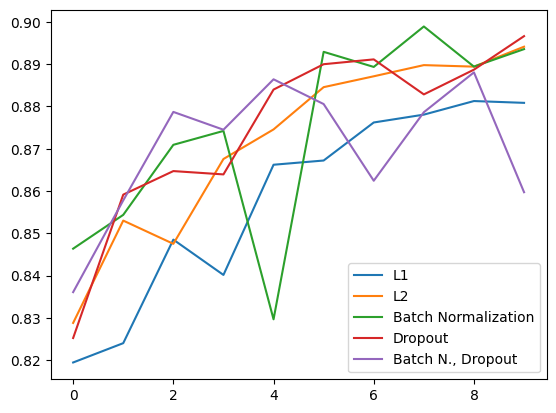

In [184]:
results_reg_df = pd.DataFrame({"L1": results_reg_l1_cf.history["val_accuracy"], "L2": results_reg_l2_cf.history["val_accuracy"], 
                               "Batch Normalization": results_reg_batch_cf.history["val_accuracy"], "Dropout": results_reg_drop_cf.history["val_accuracy"], 
                                "Batch N., Dropout": results_reg_bd_cf.history["val_accuracy"]})
results_reg_df[["L1", "L2", "Batch Normalization", "Dropout", "Batch N., Dropout"]].plot()

Z regularizace vyšel nejlépe Batch Normalization.

Nejlépe vyšla podle očekávání konvoluční síť. Vyberu si ji jako finální model. Sice podle výsledků nevypadá kombinace dropoutu a batch normalizace jako nejlepší, ale mělo by to model dobře regularizovat, aby nebyl přeučený.

In [205]:


model = make_model_cnn(3, 32, regularization_layer=["batch", "dropout"])
results_cnn, model = train_model(model, train_data, train_target, val_data, val_target, epochs=10)

Epoch 1/10
329/329 [==============================] - 48s 141ms/step - loss: 0.6647 - accuracy: 0.7607 - val_loss: 0.4320 - val_accuracy: 0.8387
Epoch 2/10
329/329 [==============================] - 49s 148ms/step - loss: 0.4232 - accuracy: 0.8430 - val_loss: 0.4410 - val_accuracy: 0.8307
Epoch 3/10
329/329 [==============================] - 49s 148ms/step - loss: 0.3682 - accuracy: 0.8627 - val_loss: 0.3892 - val_accuracy: 0.8577
Epoch 4/10
329/329 [==============================] - 46s 141ms/step - loss: 0.3298 - accuracy: 0.8768 - val_loss: 0.3368 - val_accuracy: 0.8705
Epoch 5/10
329/329 [==============================] - 48s 146ms/step - loss: 0.3114 - accuracy: 0.8839 - val_loss: 0.3289 - val_accuracy: 0.8738
Epoch 6/10
329/329 [==============================] - 48s 146ms/step - loss: 0.2925 - accuracy: 0.8890 - val_loss: 0.3627 - val_accuracy: 0.8652
Epoch 7/10
329/329 [==============================] - 47s 143ms/step - loss: 0.2755 - accuracy: 0.8975 - val_loss: 0.3021 - val_ac

In [208]:
results_cnn_final = model.evaluate(test_data.to_numpy(dtype=np.uint8).reshape(test_data.shape[0], PIXELS, PIXELS), test_target)


350/350 [==============================] - 2s 6ms/step - loss: 0.2873 - accuracy: 0.8975


In [217]:
evaluate_data = pd.read_csv("evaluate.csv")
evaluate_result = pd.DataFrame()
evaluate_result["ID"] = evaluate_data["ID"]
predictions = model.predict(evaluate_data.drop(columns=["ID"]).to_numpy(dtype=np.uint8).reshape(evaluate_data.shape[0], PIXELS, PIXELS))
pred_labels = []
for prediction in predictions:
    pred_labels.append(np.argmax(prediction))
    
evaluate_result["label"] = pred_labels
evaluate_result.to_csv("results.csv", index=False)

438/438 [==============================] - 3s 6ms/step
